# DSC 180A Quarter 1 Project Code

Wildfile Mitigation

By: Gloria Kao, Shentong Li, Neil Sharma

Outputs (tables, aggregated data, graphs, etc.) are commented out and not shown because of NDA.

## 1. EDA

EDA and merging of weather station datasets.

In [103]:
import numpy as np 
import pandas as pd
import networkx as nx

# pacakges for geospatial analysis and plotting
import geopandas as gpd
from shapely.geometry import Point

import folium
from folium.plugins import HeatMap

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

We have 5 datasets in total. We focus on 3 of them first: 

1. `gis_weatherstation_shape_2024_10_04.csv`: Information of weather stations such as names, location, structure details, etc.
2. `src_wings_meteorology_station_summary_snapshot_2023_08_02.csv`: Meteorology data for each weather stations such as max gust and alert windspeed. 
3. `src_wings_meteorology_windspeed_snapshot_2023_08_02.csv`: Windspeed snapshots collected from weather stations, ranging from years 2012 to 2022. 

In [104]:
gis_2024_1004 = pd.read_csv('data/gis_weatherstation_shape_2024_10_04.csv')
station_summary_2023_08_02 = pd.read_csv('data/src_wings_meteorology_station_summary_snapshot_2023_08_02.csv')
windspeed_2023_08_02 = pd.read_csv('data/src_wings_meteorology_windspeed_snapshot_2023_08_02.csv')

### 1.1 Table 1 - GIS 2024_10_04
#### 1.1.1 Basic Summary Stats

In [105]:
gis_2024_1004

objectid weatherstationcode     weatherstationname  scadartuid  \
0           1                CBD               Carlsbad      5158.0   
1           2                CCR             Cuca Ranch      1915.0   
2           3                CES        Country Estates      1995.0   
3         208                ROV      Rim of the Valley      4818.0   
4           5                CHO           Chollas Lake      5182.0   
..        ...                ...                    ...         ...   
218       146                HAU        Hauser Mountain      4828.0   
219       223                BOB       Bob Owens Canyon      4841.0   
220       224                MWG  MT. WOODSON GOLF CLUB      4827.0   
221         4                CGD             Cole Grade      1957.0   
222       159                CLM               Creelman      1996.0   

    structureid            nwszone  district thomasbrospagegrid  \
0       P124785        Coastal-243       6.0            1126-G1   
1       Z118027       Mountain-258       3.0            1052-A5   
2       Z416611  Inland Valley-250       3.0            1153-G7   
3       Z416170  Inland Valley-250       3.0            1071-B1   
4       P970712  Inland Valley-250       1.0            1270-C7   
..          ...                ...       ...                ...   
218     Z972858       Mountain-258       4.0            1316-J1   
219     Z571472  Inland Valley-250       4.0            1295-A7   
220     P518334  INLAND VALLEY-250       3.0            1171-D3   
221     Z416193  Inland Valley-250       3.0            1070-G1   
222     Z104188  Inland Valley-250       3.0            1172-G2   

    constructionstatus  creationuser  ... elevation twinguid hftd zone1idc  \
0                    A  seu_gis_elec  ...        72      NaN    1        N   
1                    A  seu_gis_elec  ...      2513      NaN    3        N   
2                    A  seu_gis_elec  ...      1822      NaN    3        N   
3                    A      gwharris  ...      1533      NaN    3        N   
4                    A  seu_gis_elec  ...       448      NaN    1        N   
..                 ...           ...  ...       ...      ...  ...      ...   
218                  A       calonzo  ...      3189      NaN    3        N   
219                  A       CLCosby  ...      2671      NaN    3        N   
220                  A        KSTETS  ...      1717      NaN    3        N   
221                  A  seu_gis_elec  ...      1691      NaN    2        N   
222                  A  seu_gis_elec  ...      1440      NaN    2        N   

     hftdidc  gdb_geomattr_data                                globalid  \
0          N                NaN  {ED5DE7F2-F63A-41EA-BA80-9F71495334A3}   
1          Y                NaN  {82759049-437B-4A5C-8796-10C8D7098C5B}   
2          Y                NaN  {6A3A6DAD-6CD1-43B7-A0FE-72A52A46A4F7}   
3          Y                NaN  {AD1AEA81-BC74-4954-8D25-421C79F40D88}   
4          N                NaN  {1294A90A-9558-458E-8EA5-9D15B2A16D8D}   
..       ...                ...                                     ...   
218        Y                NaN  {EFF383D5-266E-4B6D-A25B-C71D3B52247B}   
219        Y                NaN  {9D545CF5-97C2-4EA1-A794-DEDCFD1D4437}   
220        Y                NaN  {BCF2F0F6-C481-43A2-B237-DD05D83E0D13}   
221        Y                NaN  {D0BC3059-6829-459B-AD6E-3446161600EF}   
222        Y                NaN  {5FA1E82B-9378-4371-ADA0-8F7AC7F93B1B}   

                                    shape  shape_srid  snapshot_date  
0      POINT (1540299.9388 12029375.0425)        4431      10/4/2024  
1     POINT (1667010.27856 12088881.1767)        4431      10/4/2024  
2     POINT (1703876.2967 11989778.75946)        4431      10/4/2024  
3    POINT (1646528.56915 12083236.45575)        4431      10/4/2024  
4     POINT (1619955.10724 11883209.4286)        4431      10/4/2024  
..                                    ...         ...            ...  
218    POINT

In [106]:
gis_2024_1004.columns

Index(['objectid', 'weatherstationcode', 'weatherstationname', 'scadartuid',
       'structureid', 'nwszone', 'district', 'thomasbrospagegrid',
       'constructionstatus', 'creationuser', 'datecreated', 'datemodified',
       'lastuser', 'structureguid', 'symbolrotation', 'latitude', 'longitude',
       'elevation', 'twinguid', 'hftd', 'zone1idc', 'hftdidc',
       'gdb_geomattr_data', 'globalid', 'shape', 'shape_srid',
       'snapshot_date'],
      dtype='object')

In [107]:
station_location = gis_2024_1004[['weatherstationcode', 'latitude', 'longitude']]
station_location

weatherstationcode   latitude   longitude
0                  CBD  33.137352 -117.327141
1                  CCR  33.301305 -116.912993
2                  CES  33.028760 -116.792850
3                  ROV  33.285820 -116.980023
4                  CHO  32.736035 -117.066590
..                 ...        ...         ...
218                HAU  32.658194 -116.557345
219                BOB  32.673289 -116.701321
220                MWG  33.016832 -116.972033
221                CGD  33.284635 -117.015530
222                CLM  33.015660 -116.870890

[223 rows x 3 columns]

In [108]:
gis_2024_1004.describe()

objectid    scadartuid    district  symbolrotation    latitude  \
count  223.000000    222.000000  220.000000           223.0  223.000000   
mean   113.632287   4118.216216    3.468182             0.0   33.024966   
std     65.668353   2740.278065    1.004050             0.0    0.250858   
min      1.000000   1900.000000    1.000000             0.0   32.541970   
25%     57.500000   1966.250000    3.000000             0.0   32.830921   
50%    113.000000   4822.500000    3.000000             0.0   33.036349   
75%    169.500000   5144.000000    4.000000             0.0   33.230939   
max    261.000000  19200.000000    7.000000             0.0   33.569545   

        longitude    elevation  twinguid        hftd  gdb_geomattr_data  \
count  223.000000   223.000000       0.0  223.000000                0.0   
mean  -116.876526  1917.538117       NaN    2.408072                NaN   
std      0.280917  1324.409192       NaN    0.684005                NaN   
min   -117.753500    12.000000       NaN    1.000000                NaN   
25%   -117.072524   777.000000       NaN    2.000000                NaN   
50%   -116.895280  1608.000000       NaN    3.000000                NaN   
75%   -116.675728  2839.000000       NaN    3.000000                NaN   
max   -116.037800  5795.000000       NaN    3.000000                NaN   

       shape_srid  
count       223.0  
mean       4431.0  
std           0.0  
min        4431.0  
25%        4431.0  
50%        4431.0  
75%        4431.0  
max        4431.0

In [109]:
# check null
gis_2024_1004.isnull().sum()

objectid                0
weatherstationcode      0
weatherstationname      0
scadartuid              1
structureid             5
nwszone                 0
district                3
thomasbrospagegrid      2
constructionstatus      0
creationuser            0
datecreated             0
datemodified            4
lastuser                4
structureguid           6
symbolrotation          0
latitude                0
longitude               0
elevation               0
twinguid              223
hftd                    0
zone1idc                0
hftdidc                 0
gdb_geomattr_data     223
globalid                0
shape                   0
shape_srid              0
snapshot_date           0
dtype: int64

In [110]:
# num of stations contained
gis_2024_1004['weatherstationname'].nunique()

222

In [111]:
duplicate_stations = gis_2024_1004[gis_2024_1004.duplicated(subset=['weatherstationname'], keep=False)]
duplicate_stations

objectid weatherstationcode weatherstationname  scadartuid structureid  \
159       161                LAG             Laguna      1968.0      P40066   
187       191                LAG             Laguna      1968.0     P258651   

          nwszone  district thomasbrospagegrid constructionstatus  \
159  Mountain-258       4.0            1237-J3                  R   
187  Mountain-258       4.0            1237-J3                  P   

     creationuser  ... elevation twinguid hftd zone1idc  hftdidc  \
159  seu_gis_elec  ...      5024      NaN    3        N        Y   
187          cray  ...      5024      NaN    3        N        Y   

     gdb_geomattr_data                                globalid  \
159                NaN  {ACC7851A-8A44-445E-946C-F70D5E20B7E6}   
187                NaN  {02A77C09-9D50-4E03-85F8-E0E5A63D7A26}   

                                   shape  shape_srid  snapshot_date  
159  POINT (1802464.58704 11923398.8896)        4431      10/4/2024  
187  POINT (1802693.0082 11923201.08057)        4431      10/4/2024  

[2 rows x 27 columns]

In [112]:
# count of each values in 'nwszone'
gis_2024_1004['nwszone'].value_counts()

nwszone
Inland Valley-250     114
Mountain-258           54
Coastal-243            18
INLAND VALLEY-250      17
Coastal-554             4
COASTAL-243             4
MOUNTAIN-258            4
Desert-262              3
Desert-232              2
Coastal-552             1
Inland Valleys-250      1
Mountain-257            1
Name: count, dtype: int64

#### 1.1.2 Geospatial Analysis
Show the details of each station by clicking on the icon in the map.

In [113]:
map_center = [gis_2024_1004['latitude'].mean(), gis_2024_1004['longitude'].mean()]
m1 = folium.Map(location=map_center, zoom_start=10)

# Add weather station points to the map
for _, row in gis_2024_1004.iterrows():
    # Create a popup with relevant information
    popup_text = f"""
    Weather Station: {row['weatherstationname']}<br>
    Elevation: {row['elevation']} m<br>
    NWS Zone: {row['nwszone']}<br>
    Structure ID: {row['structureid']}<br>
    """
    
    # Add a marker for each weather station
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(popup_text, max_width=300),
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m1)


boundary_coords = [
    (gis_2024_1004['latitude'].min(), gis_2024_1004['longitude'].min()),
    (gis_2024_1004['latitude'].min(), gis_2024_1004['longitude'].max()),
    (gis_2024_1004['latitude'].max(), gis_2024_1004['longitude'].max()),
    (gis_2024_1004['latitude'].max(), gis_2024_1004['longitude'].min())
]

# boundary box
# folium.Polygon(locations=boundary_coords, color='green', fill=True, fill_opacity=0.2).add_to(m1)

# m1.save('weather_stations_with_area_map.html')
m1

### 1.2 Table 2 - Station Summary 2023_08_02
#### 1.2.1 Basic Summary Statistics

In [114]:
station_summary_2023_08_02

station vri  alert  max_gust  99th  95th snapshot_date
0       AMO   H     35        40    32    24    2023-08-02
1       ANE   M     35        43    32    25    2023-08-02
2       ARH   L     40        46    40    31    2023-08-02
3       AVO   H     35        43    29    24    2023-08-02
4       AVY   L     45        62    53    40    2023-08-02
..      ...  ..    ...       ...   ...   ...           ...
211     WST   M     45        51    45    39    2023-08-02
212     WSY   L     45        75    55    43    2023-08-02
213     WWY   M     45        59    46    37    2023-08-02
214     WYN   M     45        54    46    41    2023-08-02
215     YSA   L     42        54    42    35    2023-08-02

[216 rows x 7 columns]

In [115]:
station_summary_2023_08_02.describe()

alert    max_gust        99th        95th
count  216.000000  216.000000  216.000000  216.000000
mean    39.143519   50.287037   39.972222   31.495370
std      4.476580   13.020950    9.914010    7.902309
min     35.000000   16.000000   16.000000   13.000000
25%     35.000000   41.000000   32.750000   25.000000
50%     37.000000   49.000000   40.000000   31.000000
75%     45.000000   58.250000   46.000000   37.000000
max     48.000000  105.000000   81.000000   62.000000

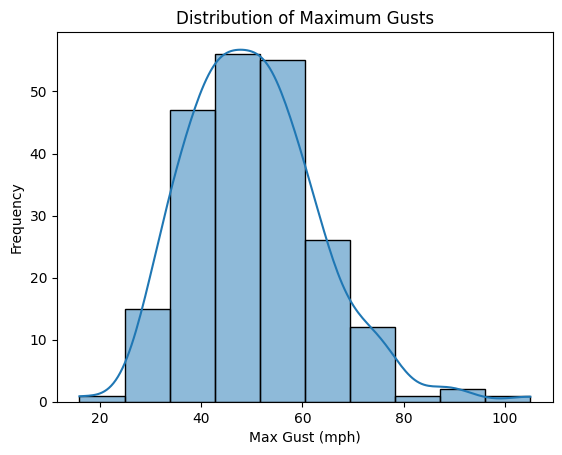

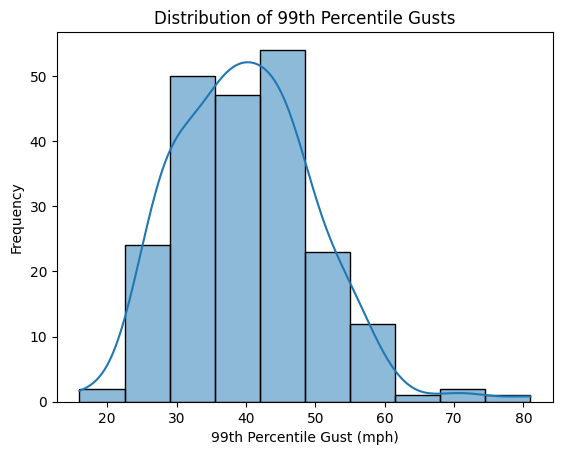

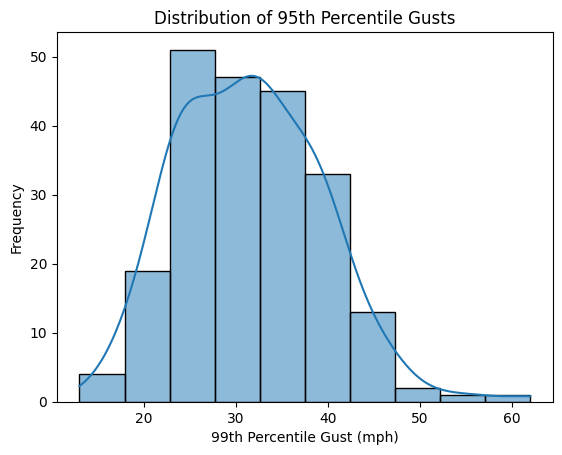

In [116]:
# distribution graphs 
sns.histplot(station_summary_2023_08_02['max_gust'], bins=10, kde=True)
plt.title('Distribution of Maximum Gusts')
plt.xlabel('Max Gust (mph)')
plt.ylabel('Frequency')
plt.show()
# plt.close()


sns.histplot(station_summary_2023_08_02['99th'], bins=10, kde=True)
plt.title('Distribution of 99th Percentile Gusts')
plt.xlabel('99th Percentile Gust (mph)')
plt.ylabel('Frequency')
plt.show()
# plt.close()


sns.histplot(station_summary_2023_08_02['95th'], bins=10, kde=True)
plt.title('Distribution of 95th Percentile Gusts')
plt.xlabel('99th Percentile Gust (mph)')
plt.ylabel('Frequency')
plt.show()
# plt.close()

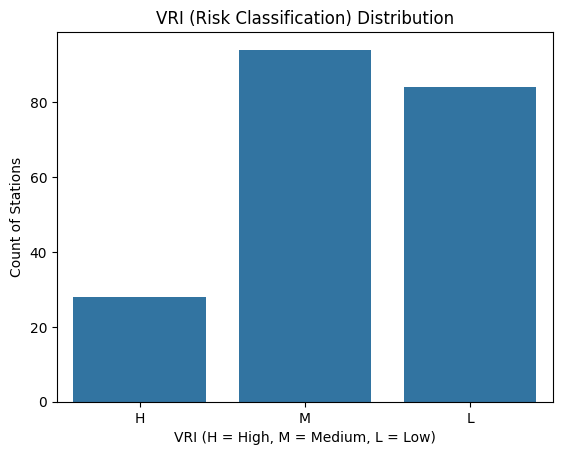

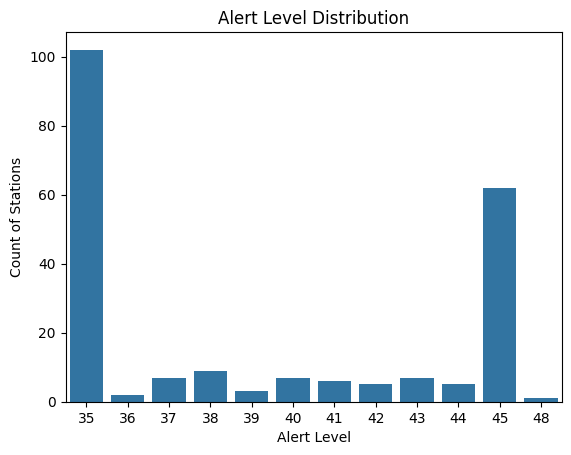

In [117]:
sns.countplot(x='vri', data=station_summary_2023_08_02)
plt.title('VRI (Risk Classification) Distribution')
plt.xlabel('VRI (H = High, M = Medium, L = Low)')
plt.ylabel('Count of Stations')
plt.show()
# plt.close()

# Bar plot for Alert Levels
sns.countplot(x='alert', data=station_summary_2023_08_02)
plt.title('Alert Level Distribution')
plt.xlabel('Alert Level')
plt.ylabel('Count of Stations')
plt.show()
# plt.close()

### 1.2.2 Merging datasets

In [118]:
# merging the two datasets about weather stations together
merged_df = pd.merge(station_summary_2023_08_02, gis_2024_1004, right_on= 'weatherstationcode', left_on='station', how='left')
merged_df

station vri  alert  max_gust  99th  95th snapshot_date_x  objectid  \
0       AMO   H     35        40    32    24      2023-08-02       8.0   
1       ANE   M     35        43    32    25      2023-08-02      89.0   
2       ARH   L     40        46    40    31      2023-08-02       9.0   
3       AVO   H     35        43    29    24      2023-08-02     175.0   
4       AVY   L     45        62    53    40      2023-08-02      92.0   
..      ...  ..    ...       ...   ...   ...             ...       ...   
213     WST   M     45        51    45    39      2023-08-02     110.0   
214     WSY   L     45        75    55    43      2023-08-02      62.0   
215     WWY   M     45        59    46    37      2023-08-02     205.0   
216     WYN   M     45        54    46    41      2023-08-02      63.0   
217     YSA   L     42        54    42    35      2023-08-02      64.0   

    weatherstationcode  weatherstationname  ...  elevation twinguid hftd  \
0                  AMO           Ammo Dump  ...      542.0      NaN  2.0   
1                  ANE              Alpine  ...     1814.0      NaN  2.0   
2                  ARH        Archie Moore  ...     1509.0      NaN  3.0   
3                  AVO             Avocado  ...      658.0      NaN  2.0   
4                  AVY     Anderson Valley  ...     2667.0      NaN  3.0   
..                 ...                 ...  ...        ...      ...  ...   
213                WST          WHITE STAR  ...     3989.0      NaN  2.0   
214                WSY   West Santa Ysabel  ...     3287.0      NaN  3.0   
215                WWY         West Wynola  ...     3577.0      NaN  3.0   
216                WYN              Wynola  ...     4133.0      NaN  3.0   
217                YSA  Santa Ysabel North  ...     3023.0      NaN  3.0   

     zone1idc hftdidc gdb_geomattr_data  \
0           N       Y               NaN   
1           N       Y               NaN   
2           N       Y               NaN   
3           N       Y               NaN   
4           N       Y               NaN   
..        ...     ...               ...   
213         N       Y               NaN   
214         Y       Y               NaN   
215         N       Y               NaN   
216         N       Y               NaN   
217         N       Y               NaN   

                                   globalid  \
0    {90874863-3E3A-4D88-A597-C531DBEE6E90}   
1    {53D5C3DA-4940-462A-AC06-26A36FC68783}   
2    {49DC14E1-2AE9-4575-93A8-C31AABF2AF48}   
3    {35312FA1-D8E4-4D96-B61C-AEE1121077B5}   
4    {CA560362-E0CE-495F-95A7-FE78A1AC3EBC}   
..                                      ...   
213  {BE80463B-2C23-41B9-AF29-CD849EB752EC}   
214  {8C492182-D488-42DF-AF4B-205E1670425D}   
215  {B5DD0B77-47C5-4C6D-BADA-708AD19D6572}   
216  {06D0644E-AEC3-4CA2-810F-DEAD5D2B1118}   
217  {7CE455DC-194A-4A02-BFCE-58D5218C9FE0}   

                                    shape shape_srid snapshot_date_y  
0      POINT (1556019.1347 12109260.1389)     4431.0       10/4/2024  
1      POINT (1710032.1223 11916452.7548)     4431.0       10/4/2024  
2    POINT (1652898.10565 11993905.15735)     4431.0       10/4/2024  
3      POINT (1562731.0996 12122126.3274)     4431.0       10/4/2024  
4      POINT (1717786.26886 11930149.546)     4431.0       10/4/2024  
..                                    ...        ...             ...  
213   POINT (1850089.07904 11850574.4489)     4431.0       10/4/2024  
214    POINT (1735417.1808 12010968.2177)     4431.0       10/4/2024  
215    POINT (1746666.3617 12017679.8949)     4431.0       10/4/2024  
216    POINT (1762159.8888 12017568.1235)     4431.0       10/4/2024  
217   POINT (1740909.08905 12020580.7369)     4431.0       10/4/2024  

[218 rows x 34 columns]

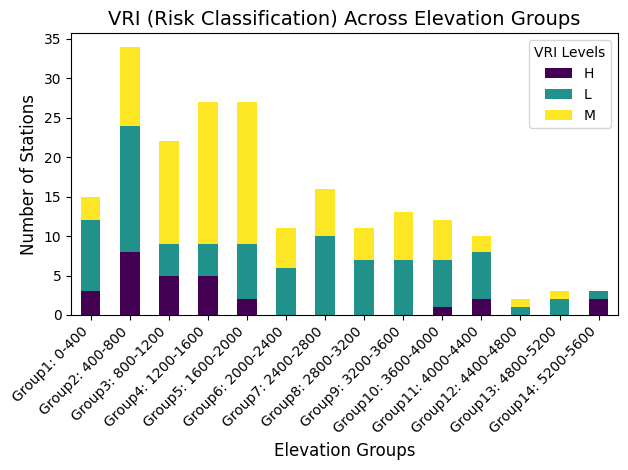

In [119]:
bins = range(0, 5800, 400)  
labels = [f'Group{i+1}: {bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]  # Create group labels

# Assign the binned elevation groups
merged_df['elevation_group'] = pd.cut(merged_df['elevation'], bins=bins, labels=labels)


elevation_vri_grouped = merged_df.groupby('elevation_group')['vri'].value_counts().unstack().fillna(0)
elevation_vri_grouped.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('VRI (Risk Classification) Across Elevation Groups', fontsize=14)
plt.xlabel('Elevation Groups', fontsize=12)
plt.ylabel('Number of Stations', fontsize=12)
plt.legend(title='VRI Levels', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# plt.close()

In [120]:
vri_weights = {'H': 3, 'M': 2, 'L': 1}
merged_df['vri_weight'] = merged_df['vri'].map(vri_weights)

# Check for missing values and remove rows with NaN in latitude, longitude, or vri_weight
cleaned_df = merged_df.dropna(subset=['latitude', 'longitude', 'vri_weight'])

# Create a list of [latitude, longitude, weight] for the heatmap
heat_data = [[row['latitude'], row['longitude'], row['vri_weight']] for index, row in cleaned_df.iterrows()]

# Create a folium map centered around the average coordinates of the data
m = folium.Map(location=[cleaned_df['latitude'].mean(), cleaned_df['longitude'].mean()], zoom_start=10)

# Add the heatmap layer
HeatMap(heat_data, min_opacity=0.2, radius=20, blur=15, max_zoom=1).add_to(m)

# Save the map to an HTML file and display it
# m.save('geospatial_risk_heatmap.html')

# If running in Jupyter or similar environments, you can display the map directly
m

### 1.3 Table 3 - Windspeed 2023_08_02
#### 1.3.1 Basic stat summary

In [121]:
windspeed_2023_08_02_edit = windspeed_2023_08_02.reset_index().drop(columns=['index'])
windspeed_2023_08_02_edit['date'] = pd.to_datetime(windspeed_2023_08_02_edit['date'], format='%m/%d/%Y')
windspeed_2023_08_02_edit

date  wind_speed station snapshot_date
0     2012-09-14        19.0     AMO      8/2/2023
1     2012-09-15        20.0     AMO      8/2/2023
2     2012-10-14        16.0     AMO      8/2/2023
3     2012-10-26        23.0     AMO      8/2/2023
4     2012-10-27        15.0     AMO      8/2/2023
...          ...         ...     ...           ...
38659 2022-11-24        36.0     YSA      8/2/2023
38660 2022-11-25        36.0     YSA      8/2/2023
38661 2022-12-21        18.0     YSA      8/2/2023
38662 2022-12-24        31.0     YSA      8/2/2023
38663 2022-12-25        26.0     YSA      8/2/2023

[38664 rows x 4 columns]

In [122]:
station_summary = windspeed_2023_08_02_edit.groupby('station')['wind_speed'].describe()
station_summary_edit = station_summary.reset_index()
station_summary_edit

station  count       mean        std   min   25%   50%   75%   max
0       AMO  166.0  19.096386   5.748495   9.0  15.0  18.0  22.0  40.0
1       ANE  179.0  19.044693   7.263748   7.0  14.0  18.0  23.5  43.0
2       ARH  179.0  25.396648   8.103557   9.0  20.0  25.0  31.0  46.0
3       AVO  179.0  19.687151   6.249710  10.0  15.0  18.0  23.0  45.0
4       AVY  116.0  33.853448  12.556138   9.0  24.0  32.0  42.0  62.0
..      ...    ...        ...        ...   ...   ...   ...   ...   ...
211     WST   61.0  32.327869   8.026459  10.0  28.0  33.0  38.0  51.0
212     WSY  176.0  38.755682  10.830247   7.0  31.0  38.0  45.0  75.0
213     WWY  179.0  33.815642   8.178801  16.0  29.0  33.0  38.0  56.0
214     WYN  178.0  35.140449   6.674637  18.0  31.0  35.0  39.0  54.0
215     YSA  179.0  30.888268   7.496728  16.0  26.0  31.0  36.0  54.0

[216 rows x 9 columns]

In [123]:
location_wind_speed_merge = pd.merge(station_location, station_summary, left_on='weatherstationcode', right_on='station', how='right')
location_wind_speed_merge_edit = location_wind_speed_merge.drop(columns=['weatherstationcode'])
location_wind_speed_merge_edit

latitude   longitude  count       mean        std   min   25%   50%  \
0    33.357121 -117.276505  166.0  19.096386   5.748495   9.0  15.0  18.0   
1    32.827078 -116.773356  179.0  19.044693   7.263748   7.0  14.0  18.0   
2    33.040094 -116.959291  179.0  25.396648   8.103557   9.0  20.0  25.0   
3    33.392510 -117.254700  179.0  19.687151   6.249710  10.0  15.0  18.0   
4    32.864675 -116.747970  116.0  33.853448  12.556138   9.0  24.0  32.0   
..         ...         ...    ...        ...        ...   ...   ...   ...   
213  32.644300 -116.318600   61.0  32.327869   8.026459  10.0  28.0  33.0   
214  33.086780 -116.689740  176.0  38.755682  10.830247   7.0  31.0  38.0   
215  33.105110 -116.652940  179.0  33.815642   8.178801  16.0  29.0  33.0   
216  33.104617 -116.602467  178.0  35.140449   6.674637  18.0  31.0  35.0   
217  33.113150 -116.671680  179.0  30.888268   7.496728  16.0  26.0  31.0   

      75%   max  
0    22.0  40.0  
1    23.5  43.0  
2    31.0  46.0  
3    23.0  45.0  
4    42.0  62.0  
..    ...   ...  
213  38.0  51.0  
214  45.0  75.0  
215  38.0  56.0  
216  39.0  54.0  
217  36.0  54.0  

[218 rows x 10 columns]

<Axes: >

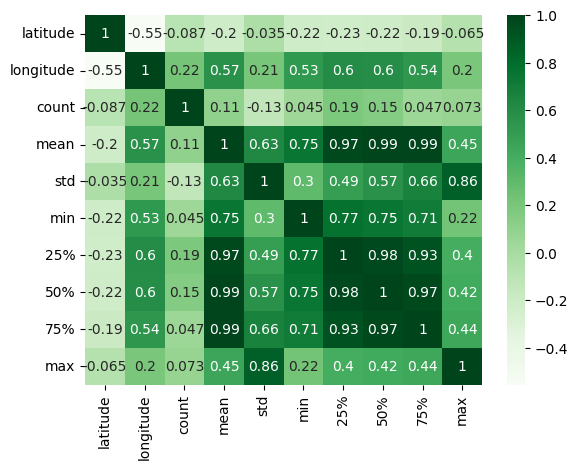

In [124]:
matrix = location_wind_speed_merge_edit.corr()
sns.heatmap(matrix, cmap="Greens", annot=True)

> Seems that there is a correlation between the wind speed and the longitude. 

In [125]:
windspeed_2023_08_02_group = windspeed_2023_08_02.groupby('station')['wind_speed'].mean()
windspeed_2023_08_02_group

station
AMO    19.096386
ANE    19.044693
ARH    25.396648
AVO    19.687151
AVY    33.853448
         ...    
WST    32.327869
WSY    38.755682
WWY    33.815642
WYN    35.140449
YSA    30.888268
Name: wind_speed, Length: 216, dtype: float64

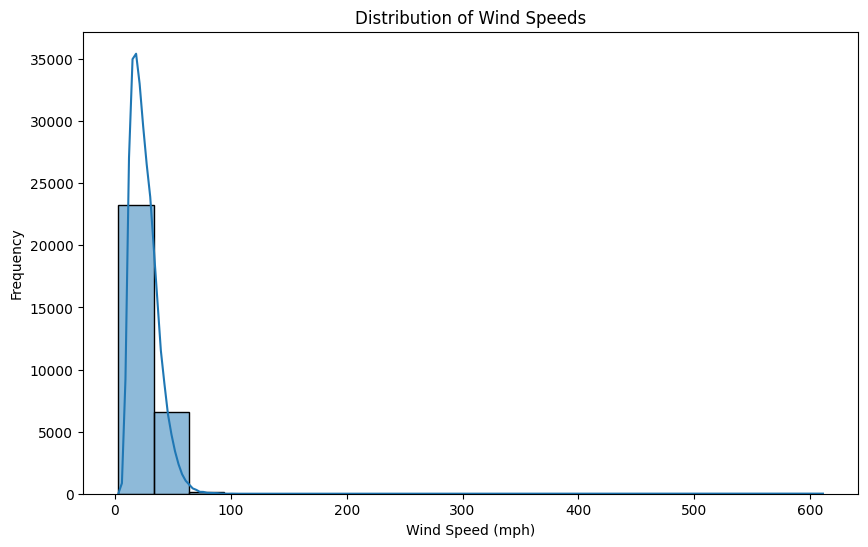

In [126]:
# Histogram for wind speed distribution
plt.figure(figsize=(10, 6))
sns.histplot(windspeed_2023_08_02_edit['wind_speed'], bins=20, kde=True)
plt.title('Distribution of Wind Speeds')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Frequency')
plt.show()
# plt.close()

> We have an outlier of windspeed over 600mph.

In [127]:
windspeed_2023_08_02[windspeed_2023_08_02['wind_speed'] > 600]

date  wind_speed station snapshot_date
2180  12/14/2013       611.0     BOC      8/2/2023

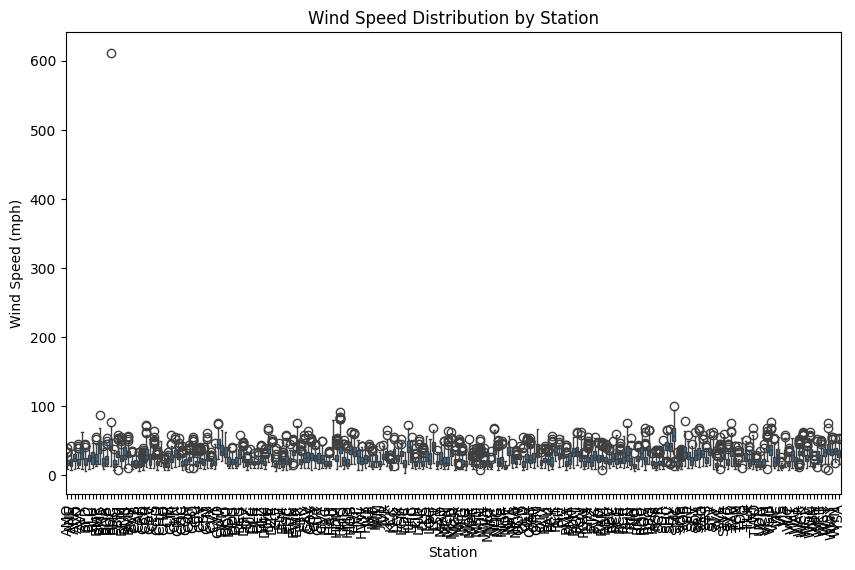

In [128]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='station', y='wind_speed', data=windspeed_2023_08_02_edit)
plt.title('Wind Speed Distribution by Station')
plt.xticks(rotation=90)
plt.xlabel('Station')
plt.ylabel('Wind Speed (mph)')
plt.show()
# plt.close()

#### 1.3.2 Analysis of windspeed over time 

In [129]:
windspeed_2023_08_02_edit['month'] = windspeed_2023_08_02_edit['date'].dt.month

month_summary = windspeed_2023_08_02_edit.groupby('month')['wind_speed'].describe()
month_summary

count       mean        std   min    25%   50%   75%    max
month                                                               
1       1596.0  30.066416  14.966189   7.0  18.00  27.0  40.0   89.0
4        556.0  30.111511  12.161458  12.0  21.75  27.0  35.0  101.0
5        956.0  31.411088  11.377918  11.0  23.00  29.0  38.0   87.0
9       2218.0  21.642922   7.751648   8.0  16.00  20.0  26.0   65.0
10      5762.0  25.158105   9.714881   8.0  18.00  23.0  31.0   78.0
11     10126.0  25.010073  10.705213   3.0  16.00  23.0  31.0   88.0
12      8726.0  26.531630  14.019785   6.0  16.00  25.0  35.0  611.0

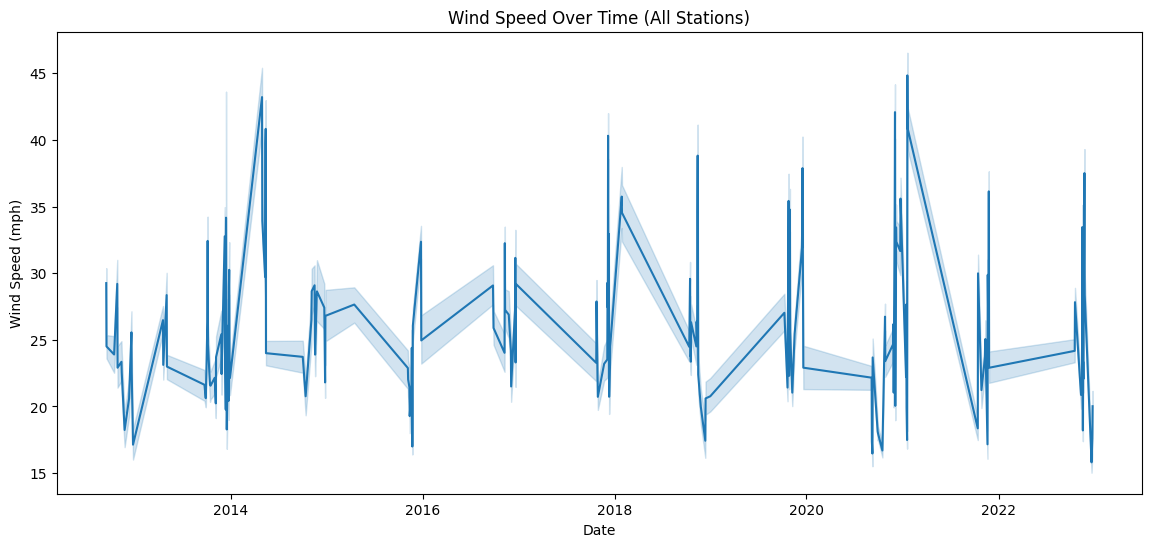

In [130]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='date', y='wind_speed', data=windspeed_2023_08_02_edit)
plt.title('Wind Speed Over Time (All Stations)')
plt.xlabel('Date')
plt.ylabel('Wind Speed (mph)')
plt.show()
# plt.close()

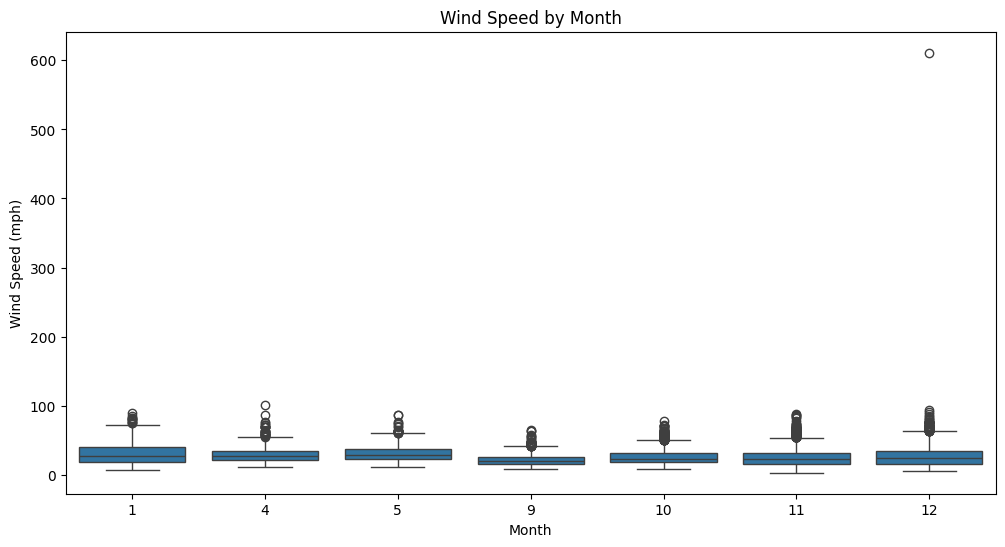

In [131]:
windspeed_2023_08_02_edit['date'] = pd.to_datetime(windspeed_2023_08_02_edit['date'])

# Extract month and year from the date
windspeed_2023_08_02_edit['month'] = windspeed_2023_08_02_edit['date'].dt.month
windspeed_2023_08_02_edit['year'] = windspeed_2023_08_02_edit['date'].dt.year

# Boxplot to show wind speed by month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='wind_speed', data=windspeed_2023_08_02_edit)
plt.title('Wind Speed by Month')
plt.xlabel('Month')
plt.ylabel('Wind Speed (mph)')
plt.show()
# plt.close()

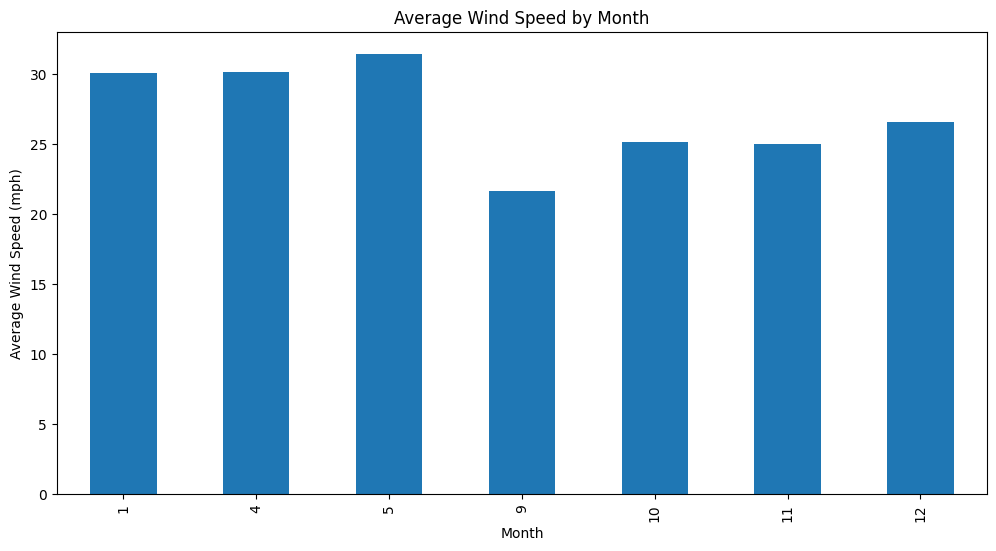

In [132]:
seasonal_corr = windspeed_2023_08_02_edit.groupby('month')['wind_speed'].mean()

# Plot the average wind speed for each month
plt.figure(figsize=(12, 6))
seasonal_corr.plot(kind='bar')
plt.title('Average Wind Speed by Month')
plt.xlabel('Month')
plt.ylabel('Average Wind Speed (mph)')
plt.show()
# plt.close()

## 2. Probability of Weather Stations

Calculating PSPS Probability of weather stations and displaying results.

In [133]:
# not all stations have the same number of windspeed records
windspeed_grouped_count = windspeed_2023_08_02.groupby(by='station').count()
windspeed_grouped_count

date  wind_speed  snapshot_date
station                                 
AMO       179         166            179
ANE       179         179            179
ARH       179         179            179
AVO       179         179            179
AVY       179         116            179
...       ...         ...            ...
WST       179          61            179
WSY       179         176            179
WWY       179         179            179
WYN       179         178            179
YSA       179         179            179

[216 rows x 3 columns]

In [134]:
station_codes = np.array(gis_2024_1004['weatherstationcode'])
merged_station_df = gis_2024_1004.merge(station_summary_2023_08_02, left_on='weatherstationcode', right_on='station', how='left')

In [135]:
# example: showing the windspeed alert threshold for the station "AMO"
merged_df[merged_df['weatherstationcode']=='AMO']['alert'].iloc[0]

35

In [136]:
# getting the PSPS probabilities of all weather stations
prob_lst = []

for station in station_codes:
    station_windspeeds = np.array(windspeed_2023_08_02[windspeed_2023_08_02['station'] == station]['wind_speed'])
    # "alert" might be nan because of less entries in station_ss_df 
    has_threshold = True
    try: 
        threshold = merged_df[merged_df['weatherstationcode'] == station]['alert'].iloc[0]
    except:
        has_threshold = False
        prob = np.nan
    mean = np.nanmean(station_windspeeds)
    if has_threshold:
        prob = np.mean([1 if x >= threshold else 0 for x in station_windspeeds]) * 100
    count = np.count_nonzero(~np.isnan(station_windspeeds))
    prob_lst.append([station, station_windspeeds, threshold, count, mean, prob])

In [137]:
# viewing the probabilities as a dataframe
prob_df = pd.DataFrame(prob_lst)
prob_df.columns = ['station', 'windspeeds', 'threshold', 'count', 'mean', 'probability (%)']
prob_df

station                                         windspeeds  threshold  \
0       CBD  [nan, nan, nan, nan, nan, nan, nan, nan, 11.0,...         35   
1       CCR  [31.0, 26.0, 27.0, 35.0, 24.0, 24.0, 25.0, 23....         45   
2       CES  [33.0, 25.0, 26.0, 38.0, 26.0, 24.0, 23.0, 19....         41   
3       ROV  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...         45   
4       CHO  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...         35   
..      ...                                                ...        ...   
218     HAU  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...         45   
219     BOB  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...         45   
220     MWG  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...         35   
221     CGD  [23.0, 20.0, 17.0, 23.0, 14.0, 20.0, 14.0, 12....         35   
222     CLM  [nan, nan, 27.0, 24.0, 22.0, 21.0, 18.0, 21.0,...         35   

     count       mean  probability (%)  
0      171  16.251462         1.117318  
1      179  31.413408        13.966480  
2      173  28.294798         7.262570  
3       49  24.265306         2.793296  
4      117  14.213675         0.000000  
..     ...        ...              ...  
218     49  48.795918        16.201117  
219     45  24.933333         2.234637  
220     49  18.530612         0.000000  
221    179  18.407821         0.558659  
222    170  24.711765         8.379888  

[223 rows x 6 columns]

In [138]:
print('max prob: ' + str(prob_df['probability (%)'].max()))
print('min prob: ' + str(prob_df['probability (%)'].min()))

max prob: 85.47486033519553
min prob: 0.0


In [139]:
# station mismatches between table 1 and table 2
prob_mismatch = prob_df[prob_df['count'] == 0]

In [140]:
# sort probability high to low
prob_sorted = prob_df.sort_values(by='probability (%)', ascending=False)[:-5]

In [141]:
# stations with less than 50 windspeed records
prob_less50 = prob_df[prob_df['count'] <50].sort_values(by='count', ascending=True)

In [142]:
def dist_boxplot(station):
    plt.figure(figsize =(4, 4))
    subset = np.array(windspeed_2023_08_02[windspeed_2023_08_02['station'] == station]['wind_speed'])
    sns.boxplot(subset, width=0.2)
    threshold = prob_df[prob_df['station'] == station]['threshold'].iloc[0]
    plt.axhline(threshold)
    prob = prob_df[prob_df['station'] == station]['probability (%)'].iloc[0]
    plt.text(x=0, y=38, s=f'probability: ' + str(prob), color='red')
    plt.title(station)
    plt.show()

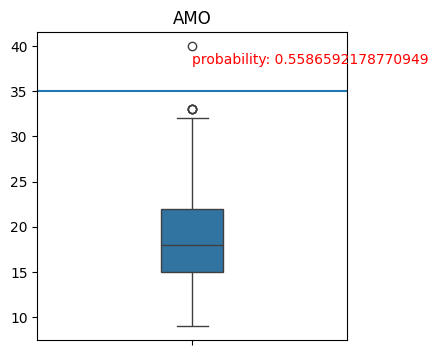

In [143]:
# can run a loop to show all stations distribtuion
# for station in station_codes:
#     dist_boxplot(station)

# showing an example for station "AMO"
dist_boxplot("AMO")

## 3. Geospatial Visualization

Merging weather station data to conductor spans and displaying PSPS Probabilities across all 3 layers geospatially.

### 3.1 New datasets

Here we introduce the 2 other datasets. They have GeoPandas "shape" attributes. 

4. `src_vri_snapshot_2024_03_20.csv`: Geospatial data and risk category for the Vegetation Risk Index (VRI) polygons.
5. `dev_wings_agg_span_2024_01_01.csv`: Information of conductor spans such as location, structure details, associates weather station, etc.

In [144]:
vri_df = pd.read_csv('data/src_vri_snapshot_2024_03_20.csv')
span_df = pd.read_csv('data/dev_wings_agg_span_2024_01_01.csv')

In [145]:
vri_df.head()

name  tessellate  extrude  visibility  \
0           Alpine_VRI          -1        0          -1   
1        Ammo Dump_VRI          -1        0          -1   
2  Anderson Valley_VRI          -1        0          -1   
3     Archie Moore_VRI          -1        0          -1   
4          Avocado_VRI          -1        0          -1   

                                 globalid           anemometer anemometercode  \
0  {9301dece-bb90-40f2-a2b3-97ddb7e2da50}           Alpine_VRI            ANE   
1  {c0955e19-d2f7-49f5-80ce-d0c46bc76e79}        Ammo Dump_VRI            AMO   
2  {8fd4f643-514c-4b53-ad51-a9ac54abcbb3}  Anderson Valley_VRI            AVY   
3  {e2879aaa-fc7a-455e-af56-382a253d08f0}     Archie Moore_VRI            ARH   
4  {ef385198-487b-483e-83c4-ee9496ac29d6}          Avocado_VRI            AVO   

   circuit district secdevice  ...               county    hftd  hftdidc  \
0      NaN       EA       NaN  ...            SAN DIEGO  Tier 2        Y   
1      NaN       NC       NaN  ...            SAN DIEGO  Tier 2        Y   
2      NaN       EA       NaN  ...            SAN DIEGO  Tier 3        Y   
3      NaN       NE       NaN  ...            SAN DIEGO  Tier 3        Y   
4      NaN       NE       NaN  ...  SAN DIEGO;RIVERSIDE  Tier 2        Y   

   zone1idc                              globalid_1  shape_length  \
0         N  {A0A86957-55F4-4FE3-A668-90BC2E37B24E}  16546.607726   
1         N  {3879A192-5CDC-47B6-BF30-8F2B20E9CD3A}  67396.343292   
2         N  {17F90E02-1078-47C6-90DD-18136A76B374}   7441.466609   
3         N  {F2C2B664-8804-4996-B4B5-143AA74B75FD}  11686.591562   
4         N  {38C385CA-3F46-4A34-87F3-8E42DAB14F60}  33397.539225   

     shape_area                                              shape shape_srid  \
0  6.250091e+06  MULTIPOLYGON Z (((-116.783579 32.826647 0, -11...       4326   
1  8.471005e+07  MULTIPOLYGON Z (((-117.297615 33.325552 0, -11...       4326   
2  1.767049e+06  MULTIPOLYGON Z (((-116.753684 32.879331 0, -11...       4326   
3  8.474172e+06  MULTIPOLYGON Z (((-116.988931 33.050367 0, -11...       4326   
4  3.757193e+07  MULTIPOLYGON Z (((-117.214118 33.377714 0, -11...       4326   

  snapshot_date  
0    2024-03-20  
1    2024-03-20  
2    2024-03-20  
3    2024-03-20  
4    2024-03-20  

[5 rows x 27 columns]

In [146]:
vri_df.columns

Index(['name', 'tessellate', 'extrude', 'visibility', 'globalid', 'anemometer',
       'anemometercode', 'circuit', 'district', 'secdevice', 'structureid',
       'tlid', 'gust_99pct', 'gust_95pct', 'gust_max', 'vri_risk', 'loaddate',
       'county', 'hftd', 'hftdidc', 'zone1idc', 'globalid_1', 'shape_length',
       'shape_area', 'shape', 'shape_srid', 'snapshot_date'],
      dtype='object')

#### 3.1.1 Changing shape columns to geometry type

Currently, the `shape` column datatype is `str` when it should be geometry. We also need to reproject to the same `shape_srid` ESPG:4326

In [147]:
# changing 'shape' columns to gemoetry type and setting CRS to ESPG 4326

gis_2024_1004['shape'] = gpd.GeoSeries.from_wkt(gis_2024_1004['shape'])
gis_gdf = gpd.GeoDataFrame(gis_2024_1004, geometry='shape').set_crs(epsg=4431).to_crs(epsg=4326)

vri_df['shape'] = gpd.GeoSeries.from_wkt(vri_df['shape'])
vri_gdf = gpd.GeoDataFrame(vri_df, geometry='shape').set_crs(epsg=4326)

span_df['shape'] = gpd.GeoSeries.from_wkt(span_df['shape'])
span_gdf = gpd.GeoDataFrame(span_df, geometry='shape').set_crs(epsg=2230).to_crs(epsg=4326)

In [148]:
# drop the shape_srid columns since we have reprojected and they are no longer correct/meaningful 
gis_gdf = gis_gdf.drop(columns=['shape_srid'])
vri_gdf = vri_gdf.drop(columns=['shape_srid'])
span_gdf = span_gdf.drop(columns=['shape_srid'])

#### 3.1.2 Merging datasets 

In [149]:
# merge on weather station codes, not yet spatial join using gpd
gis_vri_merge = gis_gdf.merge(vri_gdf, left_on='weatherstationcode', right_on='anemometercode')
gis_vri_merge

objectid weatherstationcode     weatherstationname  scadartuid  \
0           1                CBD               Carlsbad      5158.0   
1           2                CCR             Cuca Ranch      1915.0   
2           3                CES        Country Estates      1995.0   
3         208                ROV      Rim of the Valley      4818.0   
4           5                CHO           Chollas Lake      5182.0   
..        ...                ...                    ...         ...   
205       221                OLV             Olivenhain      5128.0   
206       223                BOB       Bob Owens Canyon      4841.0   
207       224                MWG  MT. WOODSON GOLF CLUB      4827.0   
208         4                CGD             Cole Grade      1957.0   
209       159                CLM               Creelman      1996.0   

    structureid_x            nwszone  district_x thomasbrospagegrid  \
0         P124785        Coastal-243         6.0            1126-G1   
1         Z118027       Mountain-258         3.0            1052-A5   
2         Z416611  Inland Valley-250         3.0            1153-G7   
3         Z416170  Inland Valley-250         3.0            1071-B1   
4         P970712  Inland Valley-250         1.0            1270-C7   
..            ...                ...         ...                ...   
205       Z181662  Inland Valley-250         3.0            1149-C1   
206       Z571472  Inland Valley-250         4.0            1295-A7   
207       P518334  INLAND VALLEY-250         3.0            1171-D3   
208       Z416193  Inland Valley-250         3.0            1070-G1   
209       Z104188  Inland Valley-250         3.0            1172-G2   

    constructionstatus  creationuser  ...             loaddate     county  \
0                    A  seu_gis_elec  ...  2021/05/21 10:37:46  SAN DIEGO   
1                    A  seu_gis_elec  ...  2021/05/21 10:37:46  SAN DIEGO   
2                    A  seu_gis_elec  ...  2021/05/21 10:37:46  SAN DIEGO   
3                    A      gwharris  ...  2021/05/21 10:37:46  SAN DIEGO   
4                    A  seu_gis_elec  ...  2021/05/21 10:37:46  SAN DIEGO   
..                 ...           ...  ...                  ...        ...   
205                  A  seu_gis_elec  ...  2021/05/21 10:37:46  SAN DIEGO   
206                  A       CLCosby  ...  2021/05/21 10:37:46  SAN DIEGO   
207                  A        KSTETS  ...  2021/05/21 10:37:46  SAN DIEGO   
208                  A  seu_gis_elec  ...  2021/05/21 10:37:46  SAN DIEGO   
209                  A  seu_gis_elec  ...  2021/05/21 10:37:46  SAN DIEGO   

       hftd_y hftdidc_y  zone1idc_y                              globalid_1  \
0    Non-HFTD         N           N  {C20D60A1-F6E8-4FD3-AF1F-C54B1A26E6DA}   
1      Tier 3         Y           N  {425B9034-E2AF-4A09-927E-3C2FC602F282}   
2      Tier 3         Y           N  {2F678369-E70E-4910-81F3-13694AB6283C}   
3      Tier 3         Y           N  {A55254D1-7241-4CD5-9B81-657736F23F79}   
4    Non-HFTD         N           N  {77A6C649-6E7F-4479-9494-C2D2C41B466D}   
..        ...       ...         ...                                     ...   
205    Tier 2         Y           N  {8972D3B2-3C74-44AF-A64B-A3587F5B5FCB}   
206    Tier 3         Y           N  {B04F9EB5-5649-4D44-84D0-2E69771B1FD4}   
207    Tier 3         Y           N  {BC63C13F-D408-4725-99D7-E47388CCF50D}   
208    Tier 2         Y           N  {029A03ED-5FE1-4A93-AA52-CAB3F5A47BD5}   
209    Tier 2         Y           N  {C3356395-C9FE-4F46-8412-BA58D1753101}   

     shape_length    shape_area  \
0    38417.323143  2.768495e+07   
1    19938.846484  9.575396e+06   
2    26301.367177  2.313316e+07   
3    12520.499687  7.042314e+06   
4     4606.861999  6.008262e+05   
..            ...           ...   
205  24964.903439  1.081265e+07   
206  24615.103490  2.234286e+07   
207  22620.238075  1.904199e+07   
208  25266.872870  1.910482e+07   
209  34916.102644  3.831391e+07   

    

In [150]:
# find polygon centroids then merge with points
vri_gdf['centroid'] = vri_gdf['shape'].centroid
vri_gdf.head()

name  tessellate  extrude  visibility  \
0           Alpine_VRI          -1        0          -1   
1        Ammo Dump_VRI          -1        0          -1   
2  Anderson Valley_VRI          -1        0          -1   
3     Archie Moore_VRI          -1        0          -1   
4          Avocado_VRI          -1        0          -1   

                                 globalid           anemometer anemometercode  \
0  {9301dece-bb90-40f2-a2b3-97ddb7e2da50}           Alpine_VRI            ANE   
1  {c0955e19-d2f7-49f5-80ce-d0c46bc76e79}        Ammo Dump_VRI            AMO   
2  {8fd4f643-514c-4b53-ad51-a9ac54abcbb3}  Anderson Valley_VRI            AVY   
3  {e2879aaa-fc7a-455e-af56-382a253d08f0}     Archie Moore_VRI            ARH   
4  {ef385198-487b-483e-83c4-ee9496ac29d6}          Avocado_VRI            AVO   

   circuit district secdevice  ...               county    hftd  hftdidc  \
0      NaN       EA       NaN  ...            SAN DIEGO  Tier 2        Y   
1      NaN       NC       NaN  ...            SAN DIEGO  Tier 2        Y   
2      NaN       EA       NaN  ...            SAN DIEGO  Tier 3        Y   
3      NaN       NE       NaN  ...            SAN DIEGO  Tier 3        Y   
4      NaN       NE       NaN  ...  SAN DIEGO;RIVERSIDE  Tier 2        Y   

   zone1idc                              globalid_1  shape_length  \
0         N  {A0A86957-55F4-4FE3-A668-90BC2E37B24E}  16546.607726   
1         N  {3879A192-5CDC-47B6-BF30-8F2B20E9CD3A}  67396.343292   
2         N  {17F90E02-1078-47C6-90DD-18136A76B374}   7441.466609   
3         N  {F2C2B664-8804-4996-B4B5-143AA74B75FD}  11686.591562   
4         N  {38C385CA-3F46-4A34-87F3-8E42DAB14F60}  33397.539225   

     shape_area                                              shape  \
0  6.250091e+06  MULTIPOLYGON Z (((-116.78358 32.82665 0, -116....   
1  8.471005e+07  MULTIPOLYGON Z (((-117.29762 33.32555 0, -117....   
2  1.767049e+06  MULTIPOLYGON Z (((-116.75368 32.87933 0, -116....   
3  8.474172e+06  MULTIPOLYGON Z (((-116.98893 33.05037 0, -116....   
4  3.757193e+07  MULTIPOLYGON Z (((-117.21412 33.37771 0, -117....   

  snapshot_date                     centroid  
0    2024-03-20  POINT (-116.76644 32.82865)  
1    2024-03-20  POINT (-117.28407 33.31558)  
2    2024-03-20   POINT (-116.74855 32.8679)  
3    2024-03-20  POINT (-116.97419 33.04258)  
4    2024-03-20  POINT (-117.21943 33.38793)  

[5 rows x 27 columns]

In [151]:
# spatial join
vri_gis_sjoin = vri_gdf.sjoin(gis_gdf, how='inner')
vri_gis_sjoin.head()

name  tessellate  extrude  visibility  \
0           Alpine_VRI          -1        0          -1   
1        Ammo Dump_VRI          -1        0          -1   
2  Anderson Valley_VRI          -1        0          -1   
3     Archie Moore_VRI          -1        0          -1   
4          Avocado_VRI          -1        0          -1   

                            globalid_left           anemometer anemometercode  \
0  {9301dece-bb90-40f2-a2b3-97ddb7e2da50}           Alpine_VRI            ANE   
1  {c0955e19-d2f7-49f5-80ce-d0c46bc76e79}        Ammo Dump_VRI            AMO   
2  {8fd4f643-514c-4b53-ad51-a9ac54abcbb3}  Anderson Valley_VRI            AVY   
3  {e2879aaa-fc7a-455e-af56-382a253d08f0}     Archie Moore_VRI            ARH   
4  {ef385198-487b-483e-83c4-ee9496ac29d6}          Avocado_VRI            AVO   

   circuit district_left secdevice  ...   latitude   longitude  elevation  \
0      NaN            EA       NaN  ...  32.827078 -116.773356       1814   
1      NaN            NC       NaN  ...  33.357121 -117.276505        542   
2      NaN            EA       NaN  ...  32.864675 -116.747970       2667   
3      NaN            NE       NaN  ...  33.040094 -116.959291       1509   
4      NaN            NE       NaN  ...  33.392510 -117.254700        658   

   twinguid  hftd_right zone1idc_right hftdidc_right gdb_geomattr_data  \
0       NaN           2              N             Y               NaN   
1       NaN           2              N             Y               NaN   
2       NaN           3              N             Y               NaN   
3       NaN           3              N             Y               NaN   
4       NaN           2              N             Y               NaN   

                           globalid_right snapshot_date_right  
0  {53D5C3DA-4940-462A-AC06-26A36FC68783}           10/4/2024  
1  {90874863-3E3A-4D88-A597-C531DBEE6E90}           10/4/2024  
2  {CA560362-E0CE-495F-95A7-FE78A1AC3EBC}           10/4/2024  
3  {49DC14E1-2AE9-4575-93A8-C31AABF2AF48}           10/4/2024  
4  {35312FA1-D8E4-4D96-B61C-AEE1121077B5}           10/4/2024  

[5 rows x 53 columns]

> Found some anomolies with the dataframe sizes, there seem to be duplicates with the same station name

In [152]:
gis_gdf.shape

(223, 26)

In [153]:
vri_gdf.shape

(308, 27)

In [154]:
vri_gis_sjoin.shape
# one extra row?

(309, 53)

In [155]:
vri_gis_sjoin.index.nunique()
# duplicates

253

In [156]:
# another spatial join
vri_wingspan_sjoin = vri_gdf.sjoin(span_gdf)
vri_wingspan_sjoin.head()

name  tessellate  extrude  visibility  \
0  Alpine_VRI          -1        0          -1   
0  Alpine_VRI          -1        0          -1   
0  Alpine_VRI          -1        0          -1   
0  Alpine_VRI          -1        0          -1   
0  Alpine_VRI          -1        0          -1   

                            globalid_left  anemometer anemometercode  circuit  \
0  {9301dece-bb90-40f2-a2b3-97ddb7e2da50}  Alpine_VRI            ANE      NaN   
0  {9301dece-bb90-40f2-a2b3-97ddb7e2da50}  Alpine_VRI            ANE      NaN   
0  {9301dece-bb90-40f2-a2b3-97ddb7e2da50}  Alpine_VRI            ANE      NaN   
0  {9301dece-bb90-40f2-a2b3-97ddb7e2da50}  Alpine_VRI            ANE      NaN   
0  {9301dece-bb90-40f2-a2b3-97ddb7e2da50}  Alpine_VRI            ANE      NaN   

  district secdevice  ...                                  buffered_tree_ids  \
0       EA       NaN  ...  ('EU7806_1', 'PS583_1', 'PB535_1', 'GL1590_1',...   
0       EA       NaN  ...  ('GL1583_1', 'GL1588_1', 'GL1588_2', 'GL1589_1...   
0       EA       NaN  ...                                                NaN   
0       EA       NaN  ...  ('GD2046_1', 'GD2045_1', 'GD2043_1', 'GD2044_1...   
0       EA       NaN  ...  ('GL1578_1', 'AE1499_1', 'AE1501_1', 'GW15612_1')   

   buffered_tree_counts                                 exclusive_tree_ids  \
0                  16.0  ('EU7806_1', 'PS583_1', 'PB535_1', 'GL1590_1',...   
0                  23.0  ('GL1583_1', 'GL1588_1', 'GL1588_2', 'GL1589_1...   
0                   NaN                                                NaN   
0                   7.0  ('GD2046_1', 'GD2045_1', 'GD2043_1', 'GD2044_1...   
0                   4.0                           ('GL1578_1', 'AE1499_1')   

   exclusive_tree_counts  transformer_counts model_major_ver model_minor_ver  \
0                    7.0                 NaN             3.0           158.0   
0                   21.0                 NaN             3.0           158.0   
0                    NaN                 NaN             NaN             NaN   
0                    6.0                 NaN             3.0           158.0   
0                    2.0                 NaN             3.0           158.0   

  model_patch_ver snapshot_date_right                        upstream_span_id  
0             0.0          2024-01-01  {AF96D42F-4112-4A9F-835B-9ED69D8E2C9E}  
0             0.0          2024-01-01  {82A153D9-87F2-4FCA-BE37-C15B6429A71C}  
0             NaN                 NaN                                     NaN  
0             0.0          2024-01-01  {FC798C7D-05E9-43AB-8794-2BF807D205C7}  
0             0.0          2024-01-01  {18949A32-D11E-4490-8BB1-9F037B3A6AAD}  

[5 rows x 130 columns]

In [157]:
vri_wingspan_sjoin.shape

(255893, 130)

In [158]:
span_gdf.shape
# significantly less rows (intersections)

(674592, 103)

### 3.2 Visualization with probabilities

#### 3.2.1 Folium map with different layers:
Weather station markers, VRI risks (heatmap), VRI areas (polygons), PSPS probability (heatmap)

In [159]:
# merge prob_df with the new spatially joined df
prob_merge = vri_gis_sjoin.merge(prob_df, left_on='weatherstationcode', right_on='station').merge(station_summary_2023_08_02, left_on='weatherstationcode', right_on='station')
prob_merge

name  tessellate  extrude  visibility  \
0             Alpine_VRI          -1        0          -1   
1          Ammo Dump_VRI          -1        0          -1   
2    Anderson Valley_VRI          -1        0          -1   
3       Archie Moore_VRI          -1        0          -1   
4            Avocado_VRI          -1        0          -1   
..                   ...         ...      ...         ...   
301          TL23051_VRI          -1        0          -1   
302          TL23051_VRI          -1        0          -1   
303          TL23053_VRI          -1        0          -1   
304          TL50001_VRI          -1        0          -1   
305          TL50003_VRI          -1        0          -1   

                              globalid_left           anemometer  \
0    {9301dece-bb90-40f2-a2b3-97ddb7e2da50}           Alpine_VRI   
1    {c0955e19-d2f7-49f5-80ce-d0c46bc76e79}        Ammo Dump_VRI   
2    {8fd4f643-514c-4b53-ad51-a9ac54abcbb3}  Anderson Valley_VRI   
3    {e2879aaa-fc7a-455e-af56-382a253d08f0}     Archie Moore_VRI   
4    {ef385198-487b-483e-83c4-ee9496ac29d6}          Avocado_VRI   
..                                      ...                  ...   
301                                     NaN          TL23051_VRI   
302                                     NaN          TL23051_VRI   
303                                     NaN          TL23053_VRI   
304  {36e69838-9e70-40d8-9bbe-21c5920f6187}          TL50001_VRI   
305  {e94fd2fb-13ad-4bf1-af54-0916b07a12f3}          TL50003_VRI   

    anemometercode  circuit district_left secdevice  ... count       mean  \
0              ANE      NaN            EA       NaN  ...   179  19.044693   
1              AMO      NaN            NC       NaN  ...   166  19.096386   
2              AVY      NaN            EA       NaN  ...   116  33.853448   
3              ARH      NaN            NE       NaN  ...   179  25.396648   
4              AVO      NaN            NE       NaN  ...   179  19.687151   
..             ...      ...           ...       ...  ...   ...        ...   
301            NaN      NaN           NaN       NaN  ...   115  18.017391   
302            NaN      NaN           NaN       NaN  ...    61  24.852459   
303            NaN      NaN           NaN       NaN  ...   179  18.849162   
304            NaN      NaN         EA;CM       NaN  ...    61  35.672131   
305            NaN      NaN            EA       NaN  ...    49  48.795918   

     probability (%)  station_y  vri alert max_gust 99th 95th snapshot_date  
0           2.234637        ANE    M    35       43   32   25    2023-08-02  
1           0.558659        AMO    H    35       40   32   24    2023-08-02  
2          13.966480        AVY    L    45       62   53   40    2023-08-02  
3           6.703911        ARH    L    40       46   40   31    2023-08-02  
4           2.234637        AVO    H    35       43   29   24    2023-08-02  
..               ...        ...  ...   ...      ...  ...  ...           ...  
301         0.000000        RPQ    L    35       36   28   23    2023-08-02  
302         2.234637        BMR    L    45       56   53   39    2023-08-02  
303         1.117318        DMH    M    35       39   34   27    2023-08-02  
304         6.145251        PCT    L    45       54   51   41    2023-08-02  
305        16.201117        HAU  NaN    45       87   73   56    2023-08-02  

[306 rows x 66 columns]

In [160]:
## VRI risk heatmap
vri_weights = {'H': 3, 'M': 2, 'L': 1}
prob_merge['vri_weight'] = prob_merge['vri'].map(vri_weights)

## PSPS probability heatmap 
# FIXME: heatmap weights not displaying correctly
prob_quantiles = prob_merge['probability (%)'].quantile([0.25, 0.5, 0.75]).tolist()
prob_weights = []
for _, row in prob_merge.iterrows():
    w = 0
    if row['probability (%)'] < prob_quantiles[0]:
        w = 1
    elif row['probability (%)'] < prob_quantiles[1]:
        w = 2
    else:
        w = 3
    prob_weights.append(w)
prob_merge['psps_weight'] = prob_weights

# Check for missing values and remove rows with NaN in latitude, longitude, vri_weight, or probability
cleaned_df = prob_merge.dropna(subset=['latitude', 'longitude', 'vri_weight', 'psps_weight'])

# Create a list of [latitude, longitude, weight] for the heatmap
heat_data = [[row['latitude'], row['longitude'], row['vri_weight']] for index, row in cleaned_df.iterrows()]

# Create a folium map centered around the average coordinates of the data
middle_point = [cleaned_df['latitude'].mean(), cleaned_df['longitude'].mean()]
m = folium.Map(location=middle_point, zoom_start=10)

# Add the heatmap layers
heatmap_layer = folium.FeatureGroup(name='VRI risk')
HeatMap(heat_data, min_opacity=0.2, radius=20, blur=15, max_zoom=1, name='VRI risk').add_to(heatmap_layer)
heatmap_layer.add_to(m)

psps_prob = folium.FeatureGroup(name='PSPS probability')
heat_data2 = [[row['latitude'], row['longitude'], row['psps_weight']] for index, row in cleaned_df.iterrows()]
HeatMap(heat_data2, min_opacity=0.2, radius=20, blur=15, max_zoom=1, name='PSPS prob').add_to(psps_prob)
psps_prob.add_to(m)


## Add weather station points to the map
marker_group = folium.FeatureGroup(name="Weather stations")
for _, row in prob_merge.iterrows():
    # Create a popup with relevant information
    popup_text = f"""
    Weather Station: {row['weatherstationname']} ({row['weatherstationcode']})<br>
    Elevation: {row['elevation']} m<br>
    NWS Zone: {row['nwszone']}<br>
    PSPS Probability: {row['probability (%)']}<br>
    """
    
    # Add a marker for each weather station
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(popup_text, max_width=300),
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(marker_group)
marker_group.add_to(m)


## Add VRI polygons layer
vri_polygons = folium.FeatureGroup(name='VRI polygons')
for i in vri_gdf['shape']:
    folium.GeoJson(i).add_to(vri_polygons)
vri_polygons.add_to(m)


# Create a layer control object and add it to our map instance
folium.LayerControl().add_to(m)

# Save the map to an HTML file and display it
# m.save('layered_map.html')

# Display interactive map in Jupyter
m

#### 3.2.2 Conductor spans 

In [161]:
span_gdf.groupby(by='psps_station').count()
# each psps station has a different number of conductor spans

Unnamed: 0  globalid  ohug  feederid  upstreamardfacilityid  \
psps_station                                                                
AMO                 2544      2544  2544      2544                   2544   
ANE                  723       723   723       723                    723   
ARH                  284       284   284       284                    284   
AVO                 3761      3761  3761      3761                   3761   
AVY                   38        38    38        38                     38   
...                  ...       ...   ...       ...                    ...   
WST                  528       528   528       528                    528   
WSY                  151       151   151       151                    151   
WWY                  496       496   496       496                    496   
WYN                  274       274   274       274                    274   
YSA                   97        97    97        97                     97   

              is_span  upstream_struct_id  upstream_struct_age  \
psps_station                                                     
AMO              2544                2531                 2190   
ANE               723                 723                  594   
ARH               284                 284                  282   
AVO              3761                3756                 3190   
AVY                38                  38                   38   
...               ...                 ...                  ...   
WST               528                 527                  463   
WSY               151                 151                  151   
WWY               496                 496                  465   
WYN               274                 274                  274   
YSA                97                  94                   91   

              upstream_struct_material  upstream_struct_hftd  ...  \
psps_station                                                  ...   
AMO                               2531                  1692  ...   
ANE                                723                   376  ...   
ARH                                284                   265  ...   
AVO                               3756                  2770  ...   
AVY                                 38                    38  ...   
...                                ...                   ...  ...   
WST                                527                   526  ...   
WSY                                151                   151  ...   
WWY                                496                   388  ...   
WYN                                274                   272  ...   
YSA                                 94                    72  ...   

              buffered_tree_counts  exclusive_tree_ids  exclusive_tree_counts  \
psps_station                                                                    
AMO                           1499                1499                   1499   
ANE                            341                 341                    341   
ARH                            245                 245                    245   
AVO                           2157                2157                   2157   
AVY                             37                  37                     37   
...                            ...                 ...                    ...   
WST                            459                 459                    459   
WSY                            149                 149                    149   
WWY                            379                 379                    379   
WYN                            269                 269                    269   
YSA                             70                  70                     70   

              transformer_counts  model_major_ver  model_minor_ver  \
psps_station                                                         
AMO                            0             2544            

In [162]:
# create folium map object
conductor_map = folium.Map(location=middle_point)

## add weather station points to the map
marker_group = folium.FeatureGroup(name="Weather stations")
for _, row in gis_gdf.iterrows():
    # Create a popup with relevant information
    popup_text = f"""
    Weather Station: {row['weatherstationname']}<br>
    Structure ID: {row['structureid']}<br>
    """
    
    # Add a marker for each weather station
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(popup_text, max_width=300),
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(marker_group)
marker_group.add_to(conductor_map)

# add hlines (each line is blue and very short)
line_group = folium.FeatureGroup(name='Conductor spans')
# only using the first 1000 lines as examples so the map/file isn't too large
for i in span_gdf['shape'][:1000]:
    folium.GeoJson(i).add_to(line_group)
line_group.add_to(conductor_map)

# add lines, grouped by the psps station it is tied to 
# commented out bc the full map/file becomes too large to be uploaded to github
# for group_name, group_data in wingspan_gdf.groupby('psps_station'):
#     feature_group = folium.FeatureGroup(name=str(group_name))
#     for _, row in group_data.iterrows()[:1000]:
#         folium.GeoJson(
#             row['shape'],
#             name=str(group_name)
#         ).add_to(feature_group)
#     feature_group.add_to(conductor_map)


# add layer (to show the difference of added objects more clearly)
folium.LayerControl().add_to(conductor_map)

# Save the map to an HTML file and display it
# conductor_map.save('conductor_span_map.html')

conductor_map

## 4. Network Graph

Creating graph network object of spans to trace upstream/downtream the grid; collect list of weather stations that could cause a shut-off to any given span.

### 4.1 Making the Network Graph

In [163]:
# engineering dataframe and types
# making the "globalid" column str type

span_gdf['globalid'] = span_gdf['globalid'].astype(str)
span_gdf['globalid'] = [x[1:-1] for x in span_gdf['globalid']]

span_gdf['upstream_span_id'] = span_gdf['upstream_span_id'].astype(str)
span_gdf['upstream_span_id'] = [x[1:-1] for x in span_gdf['upstream_span_id']]

In [164]:
# upstream matches around half
span_gdf['upstream_span_id'].isin(span_gdf['globalid']).sum()

392092

In [165]:
# empty upstream 
span_gdf['seg_upstream_trace'].isna().sum()

281569

In [166]:
# create graph
down_g = nx.DiGraph()
up_g = nx.DiGraph()

In [167]:
# add nodes
down_g.add_nodes_from(span_gdf['globalid'])
up_g.add_nodes_from(span_gdf['globalid'])

In [168]:
# add node attributes
partial_span_gdf = span_gdf[['globalid', 'upstream_span_id', 'seg_upstream_trace', 'psps_station']].reset_index()
temp_merge = partial_span_gdf.merge(station_summary_2023_08_02, how='left', left_on='psps_station', right_on='station')
partial_span_gdf = temp_merge[['globalid', 'upstream_span_id', 'seg_upstream_trace', 'psps_station', 'alert']].set_index('globalid')
partial_span_dict = partial_span_gdf.to_dict('index')
nx.set_node_attributes(down_g, partial_span_dict)

In [169]:
# match and add edges 
# .add_edge(u, v)  u -> v
# direction should go from up to down stream so searching for impact will be easier
down_edges = list(zip(span_gdf['upstream_span_id'], span_gdf['globalid']))
down_g.add_edges_from(down_edges);

In [170]:
# add edge downstream attributes
up_edges = list(zip(span_gdf['globalid'], span_gdf['upstream_span_id']))
up_g.add_edges_from(up_edges);

### 4.2 Graph Functions

Functions that will be useful later, such as searching upstrea/downstream span.

In [171]:
# using the network graph down_g

def downstream_spans(span):
    # uses bfs to find immediate downstream layer
    # includes itself
    search_edges = nx.bfs_edges(down_g, source=span)
    downstream_nodes = [span] + [v for u, v in search_edges]
    return downstream_nodes

In [172]:
# using the network graph up_g

def upstream_spans(span):
    # uses bfs to find immediate downstream layer
    # includes itself
    search_edges = nx.bfs_edges(up_g, source=span)
    upstream_nodes = [span] + [v for u, v in search_edges]
    return upstream_nodes

In [173]:
# function test
test_span = span_gdf['globalid'].iloc[32748]
print('The downstream spans of test span are:')
print(downstream_spans(test_span))
print('The upstream spans of test span are:')
print(upstream_spans(test_span))

The downstream spans of test span are:
['23877069-F148-45BA-9EB8-CBE1DF9A6D87', 'D43C3C53-4663-4CA4-98AF-935B4ED9A1CB', 'CB6E4234-14B2-4D96-9385-D9BB9FBE0499']
The upstream spans of test span are:
['23877069-F148-45BA-9EB8-CBE1DF9A6D87', 'B5790C74-045B-4822-AAC8-8B3DC409A7CC', '7141AF26-6DD2-43B8-A1BD-158D759FE363', '2B46BDA2-BE1D-4776-AB6D-BA49D45DA705', '294FA10A-EBA7-4A27-BD20-D22014460A10', '0E03F268-0CED-4ED6-A9DA-CB287F994E54', 'E69D6DFC-96F8-4EB9-B953-8A3FFCCC0877', '85E476AB-51E6-4945-B888-A7C2BE4BDFD8', 'F40C3B84-6AED-469E-B593-9747DCA8D8F0', '193AC20C-D806-4BCF-888E-AAACF7E2D7E6', 'AB73DFE5-48F6-47C3-AEB8-D04D414D9AF3', '9685B7A5-BA48-4C98-B2E0-F7525E947918', '11C09A43-92C4-468F-B309-B89E0E70CA13', '69525292-446D-43CE-B158-610D6EF66925', '3E42C92F-A3B1-431B-9E40-EC5BF6296583', 'DBB97C8A-E8C4-4BA0-984E-24FDB03F54D3', 'EEC8263E-EE35-4476-A038-9FBF871A493C', 'A46CDB1D-80DD-4191-8917-7A437C3A9E87', '40D102EE-0DED-4DFA-9BFD-277965BF5707', 'DBAF37BF-B519-4E69-9A6F-21170608D9A2', '2

In [174]:
# get an attribute of a span
def span_attribute(span, attr):
    return down_g.nodes[span][attr]

In [175]:
# search which stations would need a psps given this windspeed
def trigger_psps(windspeed):
    yes_df = station_summary_2023_08_02[station_summary_2023_08_02['alert'] <= windspeed]
    return list(yes_df['station'])

In [176]:
# search nodes with this attribute = key, and give its downstream spans
# usage: you know the station name and wants to check the psps impact if that span is turned off

def attr_search_node(attr, key):
    attrs = nx.get_node_attributes(down_g, attr)
    yes_nodes = []
    for node, a in attrs.items():
        if a == key:
            yes_nodes.append(node)

    downstream_list = []
    for n in yes_nodes:
        downstream_list.append(downstream_spans(n))
    
    output = pd.DataFrame(zip(yes_nodes, downstream_list))
    output.columns = ['globalid', 'downstream_spans']
    return output

### 4.3 Mapping Functions

Functions that will help us visualize and validate our data. Creating a map can take minutes due to the number of spans, so test/example calls are not included.

In [177]:
# maps all the spans associated with a given weather station code
# takes a long time to run because of the large number of spans
# example use: map_station_spans('ABC')

def map_station_spans(station):
    # create map
    m = folium.Map(location=middle_point, zoom_start=10)

    # add station marker to map
    row = merged_df[merged_df['weatherstationcode'] == station]
    # Create a popup with relevant information
    popup_text = f"""
    Weather Station: {row['weatherstationname'].iloc[0]}<br>
    Structure ID: {row['structureid'].iloc[0]}<br>
    Alert Windspeed: {row['alert'].iloc[0]}<br>
    """
    folium.Marker(location=[row['latitude'], row['longitude']], 
                  popup=folium.Popup(popup_text, max_width=300),
                  icon=folium.Icon(color='blue', icon='info-sign')).add_to(m)

    # find related spans
    spans_df = attr_search_node('psps_station', station)
    spans_array = np.concatenate((spans_df['globalid'], spans_df['downstream_spans'].sum()))
    spans_array = np.unique(spans_array)

    # add spans to map
    span_shapes = []
    for i in spans_array:
        span_shapes.append(span_gdf[span_gdf['globalid'] == i])
    for i in span_shapes:
        folium.GeoJson(i).add_to(m)

    return m

In [178]:
# maps the downstream spans of a given span globalid
# note: span should be a clean string with NO brackets {} 

def map_downstream_spans(span):
    # create map
    m = folium.Map(location=middle_point, zoom_start=10)

    # find downstream spans
    spans_array = downstream_spans(span)

    # add spans to map
    span_shapes = []
    for i in spans_array:
        span_shapes.append(span_gdf[span_gdf['globalid'] == i]['shape'])
    span_layer = folium.FeatureGroup(name='spans')
    for i in span_shapes:
        folium.GeoJson(i).add_to(span_layer)
    span_layer.add_to(m)

    # add marker because span might be too small
    coords = span_shapes[0].iloc[0].coords
    center = (coords[0][1], coords[0][0]) # lon lat is reversed
    marker_layer = folium.FeatureGroup(name='span marker')
    folium.Marker(location=center, icon=folium.Icon(color='red', icon='info-sign')).add_to(marker_layer)
    marker_layer.add_to(m)

    # returns multiple layers because this function is used inside another mapping function
    return m, span_layer, marker_layer

In [179]:
# maps the upstream spans of a given span globalid
# note: span should be a clean string with NO brackets {} 

def map_upstream_spans(span):
    # create map
    m = folium.Map(location=middle_point, zoom_start=10)

    # find downstream spans
    spans_array = upstream_spans(span)

    # add spans to map
    span_shapes = []
    for i in spans_array:
        span_shapes.append(span_gdf[span_gdf['globalid'] == i]['shape'])
    style = {'color': 'red'}
    span_layer = folium.FeatureGroup(name='spans')
    for i in span_shapes:
        folium.GeoJson(i, style_function=lambda x:style).add_to(span_layer)
    span_layer.add_to(m)

    # add marker because span might be too small
    coords = span_shapes[0].iloc[0].coords
    center = (coords[0][1], coords[0][0]) # lon lat is reversed
    marker_layer = folium.FeatureGroup(name='span marker')
    folium.Marker(location=center, icon=folium.Icon(color='red', icon='info-sign')).add_to(marker_layer)
    marker_layer.add_to(m)

    # returns multiple layers because this function is used inside another mapping function
    return m, span_layer, marker_layer

In [180]:
# maps the whole stream of a given span
# note: span should be a clean string with NO brackets {} 

def map_whole_stream(span):
    # create map
    m = folium.Map(location=middle_point, zoom_start=10)

    # combining the layers from the previous two functions into one 
    m1, down_layer, marker_layer = map_downstream_spans(span)
    m2, up_layer, marker_layer = map_upstream_spans(span)

    down_layer.add_to(m)
    up_layer.add_to(m)
    marker_layer.add_to(m)

    return m

## 5. Probability of Conductor Spans

Computing PSPS Probability of every conductor span.

In [181]:
def calculate_station_psps_probability(windspeed_data, station_summary_data):
    station_psps_probabilities = {}

    for _, row in station_summary_data.iterrows():
        station = row['station']
        alert_speed = row['alert']

        station_wind_data = windspeed_data[windspeed_data['station'] == station]
        if station_wind_data.empty:
            continue

        count_above_alert = sum(station_wind_data['wind_speed'] >= alert_speed)
        psps_prob = count_above_alert / len(station_wind_data)
        station_psps_probabilities[station] = psps_prob

    return station_psps_probabilities

station_psps_probabilities = calculate_station_psps_probability(windspeed_2023_08_02, station_summary_2023_08_02)

In [182]:
# first weather station psps
first_key = next(iter(station_psps_probabilities))
first_value = station_psps_probabilities[first_key]
first_value

0.00558659217877095

In [183]:
max_psps_prob_station = max(station_psps_probabilities, key=station_psps_probabilities.get)
print(max_psps_prob_station, ":",station_psps_probabilities[max_psps_prob_station])

SIL : 0.8547486033519553


Weight the contributions from downstream spans based on the distance to the given span. Total weight starts at 1 for the given span and then adds the weights of all downstream spans.

In [184]:
import networkx.algorithms.shortest_paths.weighted as nx_shortest_path

def calculate_psps_probability(conductor_span_data, windspeed_data, down_g, station_psps_probabilities):
    psps_probabilities = {}

    for _, row in conductor_span_data.iterrows():
        span_id = row['globalid']

        psps_station = row['psps_station']
        if pd.isna(psps_station) or psps_station not in station_psps_probabilities:
            continue

        span_psps_prob = station_psps_probabilities[psps_station]

        downstream_spans_lst = list(down_g.successors(span_id)) if span_id in down_g else []
        total_weight = 1.0  # initiate the weight for the given span
        weighted_sum = span_psps_prob

        for downstream_span in downstream_spans_lst:
            if downstream_span in psps_probabilities:
                # distance between the given span and downstream span
                try:
                    distance = nx_shortest_path.dijkstra_path_length(down_g, span_id, downstream_span, weight='weight')
                    weight = 1 / (distance + 1)  # weight is inversely proportional to distance
                    total_weight += weight
                    weighted_sum += psps_probabilities[downstream_span] * weight
                except nx.NetworkXNoPath:
                    continue

        psps_prob = weighted_sum / total_weight
        psps_probabilities[span_id] = psps_prob

    return psps_probabilities

# PSPS probabilities for all spans
psps_probabilities = calculate_psps_probability(span_df, windspeed_2023_08_02, down_g, station_psps_probabilities)

### Task1: Span(s) impacted by the greatest number of weather stations

In [185]:
station_counts = span_df['psps_station'].value_counts()
max_station_count = station_counts.max()
spans_with_max_stations = span_df[span_df['psps_station'].isin(station_counts[station_counts == max_station_count].index)]['globalid'].unique()
print(spans_with_max_stations)

['{BEF560FB-DE0B-4B1F-914C-1F195A3A2991}'
 '{52E51123-E13B-4CF9-8B64-E002BBB92AA5}'
 '{15D8FF2F-D42B-4373-B46F-7C51D8CCD8D3}' ...
 '{8293F3BB-0757-4792-AA0B-AFC08542A0F2}'
 '{DF66D429-B3E9-485C-A51C-9B38D8DA5C8F}'
 '{A49C7F4E-6F6C-40C0-A5C3-FDE2F56846DF}']


### Task 2: Span with the highest probability of being shut off

In [186]:
max_psps_prob_span = max(psps_probabilities, key=psps_probabilities.get)
print(max_psps_prob_span, ":",psps_probabilities[max_psps_prob_span])

{B4D607A5-DA7F-4B3D-965C-C7FCC6516E0C} : 0.8547486033519553


In [187]:
span_id = max_psps_prob_span
span_details = span_df[span_df['globalid'] == span_id]
print(span_details['station'])
downstream_spans_lst = list(down_g.successors(span_id[1:-1]))  # sliced span_id because it had brackets
has_downstream = len(downstream_spans_lst) > 0
print(has_downstream)

137523    SIL
Name: station, dtype: object
False


### Task 3: Probability of any span within parent feederid 222 being shut off

In [188]:
# the same feederid 222 is recorded as both an int and str in the dataset
# so we concatenate them into one dataset with 3024 spans
df1 = span_df[span_df['parent_feederid'] == '222']
df2 = span_df[span_df['parent_feederid'] == 222]
feeder222_df = pd.concat([df1, df2], ignore_index=True)
feeder222_df

Unnamed: 0                                globalid ohug feederid  \
0           1172  {124D93E0-1CEF-41EB-B7E8-FB7C561A469E}   UG      222   
1           1504  {688DB99B-3309-4C74-923B-5BDA3C0E15C4}   UG      222   
2           1963  {FCE7764A-BAB8-4E27-8882-8FFC94BACF58}   UG      222   
3           1966  {1A9D8C49-D305-4BDA-BBA5-67CDFDB3493E}   UG      222   
4           2400  {00A47339-5F14-4385-AD53-3AF65CB7DEB8}   UG      222   
...          ...                                     ...  ...      ...   
3019      350221  {00858EB1-7B39-4FEE-ABE8-57A6A848A175}   UG      222   
3020      350253  {33F4DBBC-98DF-4065-93DF-E834565953AA}   UG      222   
3021      350895  {5160F609-5792-42AA-958B-AED71B61D5D0}   UG      222   
3022      351138  {535B54C8-7AC7-4EFC-ACFC-D33B552E9022}   UG      222   
3023      351775  {CBAD8372-4F4C-46F0-86BE-8007C7BFC5BA}   UG      222   

     upstreamardfacilityid is_span upstream_struct_id  upstream_struct_age  \
0                222-1401R    True            P161117            27.583333   
1                 222-2085    True            P612623            54.000000   
2                222-1988R    True            P812552             6.750000   
3                222-1988R    True            H142501                  NaN   
4                222-1370R    True        H3300085000                  NaN   
...                    ...     ...                ...                  ...   
3019             222-2013R    True            H141207                  NaN   
3020             222-2013R    True            H141206                  NaN   
3021              222-2085    True            H142147                  NaN   
3022             222-2013R    True            H141209                  NaN   
3023             222-2013R    True            H141212                  NaN   

     upstream_struct_material  upstream_struct_hftd  ... exclusive_tree_ids  \
0                        WOOD                   3.0  ...                NaN   
1                        WOOD                   3.0  ...                NaN   
2                       STEEL                   3.0  ...                NaN   
3                         CON                   NaN  ...                NaN   
4                         CON                   NaN  ...                NaN   
...                       ...                   ...  ...                ...   
3019                      CON                   NaN  ...                NaN   
3020                      CON                   NaN  ...                NaN   
3021                      CON                   NaN  ...                NaN   
3022                      CON                   NaN  ...                NaN   
3023                      CON                   NaN  ...                NaN   

     exclusive_tree_counts transformer_counts  model_major_ver  \
0                      NaN                NaN              3.0   
1                      NaN                NaN              3.0   
2                      NaN                NaN              3.0   
3                      NaN                NaN              3.0   
4                      NaN                NaN              3.0   
...                    ...                ...              ...   
3019                   NaN                NaN              3.0   
3020                   NaN                NaN              3.0   
3021                   NaN                NaN              3.0   
3022                   NaN                NaN              3.0   
3023                   NaN                NaN              3.0   

     model_minor_ver  model_patch_ver snapshot_date  \
0              158.0              0.0    2024-01-01   
1              158.0              0.0    2024-01-01   
2              158.0              0.0    2024-01-01   
3              158.0              0.0    2024-01-01   
4              158.0              0.0    2024-01-01   
...              ...              ...           ...   
3019           158.0              0.0    2024-01-01  

In [189]:
feeder_222_spans = feeder222_df['globalid']
feeder_222_probs = [psps_probabilities[span] for span in feeder_222_spans if span in psps_probabilities]
feeder_222_prob = sum(feeder_222_probs) / len(feeder_222_probs) if feeder_222_probs else 0
feeder_222_prob

0.15529950341402854

## 6. Estimating the Future

Estimate expected customers that'll be shut-off over the next 10 years at the span/segment/circuit granularity.

The code below focuses on feederid 222.

In [ ]:
feeder222_df['circuit']

In [190]:
feeder222_df[['cust_total', 'downstream_cust_total']].sum()

cust_total                 1438.0
downstream_cust_total    254703.0
dtype: float64

In [191]:
overall_total_cust = 254703 + 1438
overall_total_cust

256141

In [192]:
infra_df = feeder222_df[['globalid', 'conductor_age', 'hardened_state', 'psps_station_vri','cust_total', 'downstream_cust_total', 'work_scope_hardened_year']]

current_year = 2024
years = list(range(current_year, current_year + 10))

risk_reduction = 0.5  # Hardening reduces risk by 50%

infra_df["conductor_age"].fillna(0, inplace=True)
infra_df["has_conductor"] = infra_df["conductor_age"] > 0

results = {year: [] for year in years}

for year in years:
    infra_df["hardened"] = infra_df["work_scope_hardened_year"].notna() & (infra_df["work_scope_hardened_year"] <= year)  # Check if span is hardened
    infra_df["adjusted_cust_total"] = infra_df.apply(
        lambda row: row["cust_total"] * (risk_reduction if row["hardened"] else 1) * (1 if row["has_conductor"] else 0.8), axis=1
    )

    infra_df["adjusted_downstream_cust_total"] = infra_df.apply(
        lambda row: row["downstream_cust_total"] * (risk_reduction if row["hardened"] else 1) * (1 if row["has_conductor"] else 0.8), axis=1
    )

    # Sum adjusted customer totals for the year
    results[year] = infra_df["adjusted_cust_total"].sum() + infra_df["adjusted_downstream_cust_total"].sum()

impact_df = pd.DataFrame(list(results.items()), columns=["Year", "Affected_Customers"])
impact_df

Year  Affected_Customers
0  2024            253644.4
1  2025            191751.1
2  2026            191751.1
3  2027            191751.1
4  2028            191751.1
5  2029            191751.1
6  2030            191751.1
7  2031            191751.1
8  2032            191751.1
9  2033            191751.1

In [193]:
infra_total = impact_df['Affected_Customers'].sum()

print('Total number of customers that can be impacted by PSPS based off the current infrastructure state is: ', int(infra_total))
print(f'About {(infra_total/(overall_total_cust*10)) * 100}% of customers will be impacted')

Total number of customers that can be impacted by PSPS based off the current infrastructure state is:  1979404
About 77.27791724089468% of customers will be impacted


In [194]:
from sklearn.preprocessing import MinMaxScaler

ex_df = feeder222_df[['globalid', 'cust_total', 'downstream_cust_total', 'work_scope_hardened_year', 'conductor_age', 'hardened_state', 'psps_station_vri', 'psps_station_95th_percentile_wind_gust', 
                      'buffered_tree_counts']]

vri_mapping = {"L": 1, "M": 2, "H": 3}
ex_df["psps_station_vri"] = ex_df["psps_station_vri"].map(vri_mapping)

scaler = MinMaxScaler()
ex_df[["vri_norm", "wind_gust_norm", "tree_count_norm"]] = scaler.fit_transform(
    ex_df[["psps_station_vri", "psps_station_95th_percentile_wind_gust", "buffered_tree_counts"]]
)

ex_df["psps_probability"] = ex_df["globalid"].map(psps_probabilities).fillna(0)

ex_df["composite_risk"] = (
    0.4 * ex_df["vri_norm"] +
    0.3 * ex_df["wind_gust_norm"] +
    0.3 * ex_df["tree_count_norm"] +
    0.5 * ex_df["psps_probability"]  # Random weights, feel free to change
)

# Define a 10-year range
current_year = 2024
years = list(range(current_year, current_year + 10))

# Initialize results dictionary for yearly analysis
results = {year: [] for year in years}

# Iterate over each year
risk_reduction = 0.5  # Hardening reduces risk by 50%
ex_df["conductor_age"].fillna(0, inplace=True)
ex_df["has_conductor"] = ex_df["conductor_age"] > 0

for year in years:
    ex_df["hardened"] = ex_df["work_scope_hardened_year"].notna() & (ex_df["work_scope_hardened_year"] <= year)  # Check if span is hardened
    ex_df["adjusted_cust_total"] = ex_df.apply(
        lambda row: row["cust_total"] * (risk_reduction if row["hardened"] else 1) * row["composite_risk"], axis=1
    )
    ex_df["adjusted_downstream_cust_total"] = ex_df.apply(
        lambda row: row["downstream_cust_total"] * (risk_reduction if row["hardened"] else 1) * row["composite_risk"], axis=1
    )
    
    results[year] = ex_df["adjusted_cust_total"].sum() + ex_df["adjusted_downstream_cust_total"].sum()

impact_with_risks_df = pd.DataFrame(list(results.items()), columns=["Year", "Affected_Customers (with Risk)"])
impact_with_risks_df

Year  Affected_Customers (with Risk)
0  2024                    84057.705982
1  2025                    56978.085664
2  2026                    56978.085664
3  2027                    56978.085664
4  2028                    56978.085664
5  2029                    56978.085664
6  2030                    56978.085664
7  2031                    56978.085664
8  2032                    56978.085664
9  2033                    56978.085664

In [195]:
external_risk_total = impact_with_risks_df['Affected_Customers (with Risk)'].sum()

print('Total number of customers that can be impacted by PSPS based off external risk factors with infrastrcture: ', int(external_risk_total))
print(f'About {(external_risk_total/(overall_total_cust*10)) * 100}% of customers will be impacted')

Total number of customers that can be impacted by PSPS based off external risk factors with infrastrcture:  596860
About 23.302028061007643% of customers will be impacted


In [196]:
current_year = 2024
years = list(range(current_year, current_year + 10))

np.random.seed(42) 
temporal_risks = []
for year in years:
    variation = np.random.uniform(0.9, 1.1, size=len(ex_df))  # ±10% variation
    temporal_risks.append({
        "year": year,
        "vri_norm": ex_df["vri_norm"] * variation,
        "wind_gust_norm": ex_df["wind_gust_norm"] * variation,
        "tree_count_norm": ex_df["tree_count_norm"] * variation,
    })

results = {year: 0 for year in years}

# Perform temporal analysis
risk_reduction = 0.5  # Hardening reduces risk by 50%
ex_df["conductor_age"].fillna(0, inplace=True)  # Fill missing conductor_age
ex_df["has_conductor"] = ex_df["conductor_age"] > 0  # Flag rows with conductors

for yearly_risks in temporal_risks:
    year = yearly_risks["year"]
    ex_df["hardened"] = ex_df["work_scope_hardened_year"].notna() & (ex_df["work_scope_hardened_year"] <= year)

    # Recalculate composite risk for the year
    ex_df["composite_risk"] = (
        0.4 * yearly_risks["vri_norm"] +
        0.3 * yearly_risks["wind_gust_norm"] +
        0.3 * yearly_risks["tree_count_norm"] +
        0.5 * ex_df["psps_probability"]
    )

    # Recalculate affected customers
    ex_df["adjusted_cust_total"] = ex_df.apply(
        lambda row: row["cust_total"] * (risk_reduction if row["hardened"] else 1) * row["composite_risk"], axis=1
    )
    ex_df["adjusted_downstream_cust_total"] = ex_df.apply(
        lambda row: row["downstream_cust_total"] * (risk_reduction if row["hardened"] else 1) * row["composite_risk"], axis=1
    )
    results[year] = ex_df["adjusted_cust_total"].sum() + ex_df["adjusted_downstream_cust_total"].sum()


impact_with_TA_df = pd.DataFrame(list(results.items()), columns=["Year", "Affected_Customers (Dynamic Risks)"])
impact_with_TA_df

Year  Affected_Customers (Dynamic Risks)
0  2024                        84097.839690
1  2025                        57055.462847
2  2026                        56850.484696
3  2027                        56871.487426
4  2028                        56837.771042
5  2029                        56905.138544
6  2030                        57211.233090
7  2031                        57142.286282
8  2032                        56881.193601
9  2033                        56827.133481

In [197]:
TA_total = impact_with_TA_df['Affected_Customers (Dynamic Risks)'].sum()

print('Total number of customers that can be impacted by PSPS based off external risk factors with infrastrcture: ', int(TA_total))
print(f'About {(TA_total/(overall_total_cust*10)) * 100}% of customers will be impacted')

Total number of customers that can be impacted by PSPS based off external risk factors with infrastrcture:  596680
About 23.294983259211165% of customers will be impacted


In [ ]:
expected_customers_shutoff = 0
for span in feeder_222_spans:
    if span in psps_probabilities:
        customer_count = span_df[span_df['globalid'] == span]['downstream_cust_total'].values
        if len(customer_count) > 0:
            expected_customers_shutoff += psps_probabilities[span] * customer_count[0]
print(expected_customers_shutoff)